## Problem 4
**Multiresolution Blending**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
import skimage

**Reading and displaying images**

Read the images of Apple and Oreange and display it.

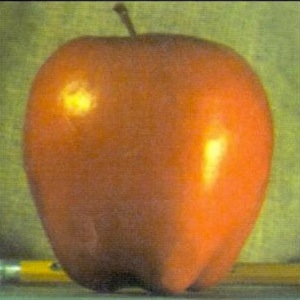

In [2]:
app=cv2.imread('apple.jpeg')
cv2_imshow(app)
apx=cv2.cvtColor(app, cv2.COLOR_BGR2RGB)

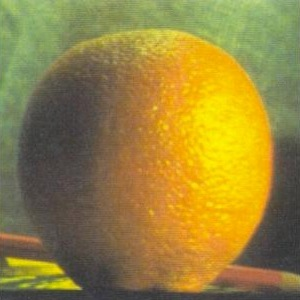

In [3]:
orn=cv2.imread('orange.jpeg')
cv2_imshow(orn)
orx=cv2.cvtColor(orn, cv2.COLOR_BGR2RGB)

**Direct Blending**

(300, 300, 3)
150


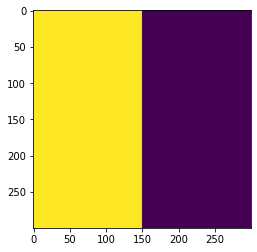

In [4]:
#Creating the mask for direct blending
app1=skimage.img_as_float64(apx,force_copy=False)
orn1=skimage.img_as_float64(orx,force_copy=False)
dim1=app1.shape
print(dim1)
hp=int(dim1[0]/2)
print(hp)
mask=np.zeros(dim1)
mask[:,:hp]=1
plt.imshow(mask[:,:,0])

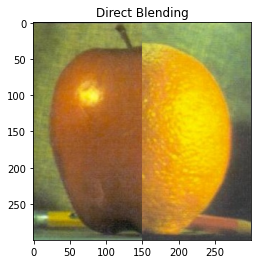

In [5]:
#blending the image
ap1= app1*mask
or1= orn1*(1-mask)
bl1=ap1+or1
plt.figure()
plt.imshow(bl1)
plt.title("Direct Blending")
plt.show()

**Alfa Blending**

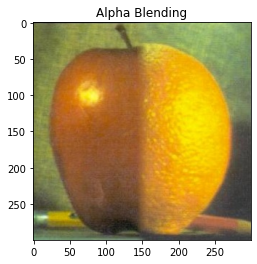

In [6]:
#creating mask and applying alfa blending
ba=15
maskg=cv2.GaussianBlur((mask),(ba,ba),ba,cv2.BORDER_WRAP)
ap2= app1*maskg
or2= orn1*(1-maskg)
bl2=ap2+or2
plt.figure()
plt.imshow(bl2)
plt.title("Alpha Blending")
plt.show()

**Multi Resolution Blending**

In [7]:
#function for creating gaussian pyramid 
def gaus(image,steps):
  inp_img=image
  gar=[]
  gar.append(image)
  for i in range(steps):
    w=inp_img.shape[1]
    h=inp_img.shape[0]
    new=(int(w/2),int(h/2))
    blur=cv2.GaussianBlur(inp_img,(5,5),0)
    par=blur[::2,::2]
    imag=cv2.resize(par,new)
    gar.append(imag)
    inp_img=imag

  return gar

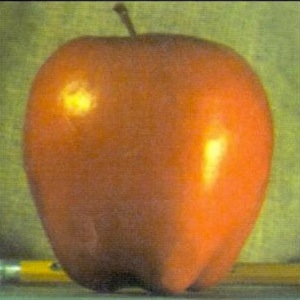

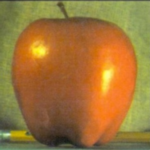

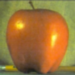

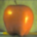

In [8]:
#implementation of gaussian pyramid
st=5
ga=gaus(app,st)
for i in range(st):
  cv2_imshow(ga[i]) 

In [9]:
#Function to create Laplacian Pyramid
def lap(image,steps):
  inp_img=image
  imar=[]
  lar=[]
  imar.append(image)
  for i in range(steps-1):
    w=inp_img.shape[1]
    h=inp_img.shape[0]
    new=(int(w/2),int(h/2))
    blur=cv2.GaussianBlur(inp_img,(5,5),0)
    #par=blur[::2,::2]
    res=inp_img-blur
    lar.append(res)
    ims = cv2.resize(blur,new)
    imar.append(ims)
    inp_img=ims

  lar.append(imar[-1])
  return lar

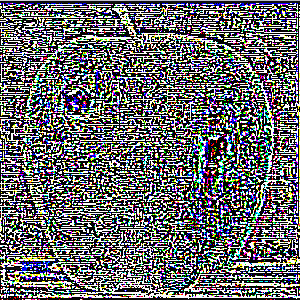

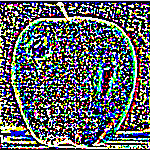

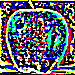

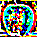

In [10]:
#print laplacian pyramid
st=5
la=lap(app,st)
for i in range(len(la)):
  cv2_imshow(la[i]) 

In [11]:
#definition to reconstruct image from laplacian pyramid 
def recon(lar):
  imref=lar[-1]
  for le in range(len(lar)-2,-1,-1):
    rec=cv2.resize(imref,(lar[le].shape[1],lar[le].shape[0]))
    print(lar[le].shape)
    imt=lar[le]
    imref=rec+imt
  return imref

(37, 37, 3)
(75, 75, 3)
(150, 150, 3)
(300, 300, 3)


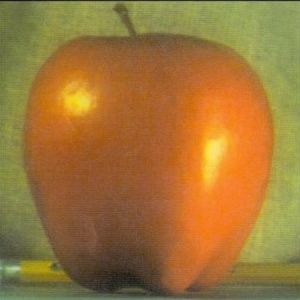

In [12]:
imgre1=recon(la)
cv2_imshow(imgre1)

In [15]:
#Function for multiresolution blending
def multiblend1(app1,orn1,s):
  dim1=app1.shape
  print(dim1)
  hp=int(dim1[0]/2)
  print(hp)
  mask=np.zeros(dim1)
  mask[:,:hp]=1
  plt.imshow(mask[:,:,0])
  
  m1ar=gaus(mask,s)
  m2=1-mask
  m2ar=gaus(m2,s)
  alar=lap(app1,s)
  # for i in range(s):
  #   plt.figure()
  #   plt.imshow(alar[i]) 
  olar=lap(orn1,s)
  oral=[]
  appbl=[]
  msb1=[]
  for msb in range(s):
    temp1=alar[msb]*m1ar[msb]
    appbl.append(temp1)
    temp2=olar[msb]*m2ar[msb]
    oral.append(temp2)
  for bli in range(s):
    temp3=appbl[bli]+oral[bli]
    msb1.append(temp3)

  imgr1=recon(msb1)
  print(type(imgr1))


  return imgr1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 300, 3)
150
(37, 37, 3)
(75, 75, 3)
(150, 150, 3)
(300, 300, 3)
<class 'numpy.ndarray'>


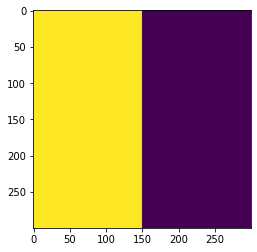

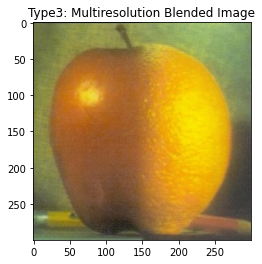

In [17]:
#Creating multi resolution Blended image
fb1=multiblend1(app1,orn1,5)
plt.figure()
plt.imshow(fb1)
plt.title("Type3: Multiresolution Blended Image")
plt.show()